In [1]:
import pandas as pd
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('C:\Documents\Premi_ClubQ8.csv', sep = ';', decimal=",")


df[['REQUEST_DATE','REQUEST_TIME']] = df.DATA_OPERAZIONE.str.split(" ",expand=True,)

df = df.drop(columns="DATA_OPERAZIONE")

df.columns = ['CUSTOMER_CODE', 'REQUEST_PLACE', 'CATEGORY', 'MATERIAL_GROUPING', 'PRIZE_DESCRIPTION', 'POINTS_REQUIRED', 'CUSTOMER_CONTRIBUTION', 'DATE', 'TIME']
df.dtypes

df['CUSTOMER_CONTRIBUTION'] = df['CUSTOMER_CONTRIBUTION'].astype(float)

df
#df['CUSTOMER_CONTRIBUTION'] = df['CUSTOMER_CONTRIBUTION'].round(decimals = 1)



#df['CUSTOMER_CONTRIBUTION'] = df['CUSTOMER_CONTRIBUTION'].fillna(0.0)




,CUSTOMER_CODE,REQUEST_PLACE,CATEGORY,MATERIAL_GROUPING,PRIZE_DESCRIPTION,POINTS_REQUIRED,CUSTOMER_CONTRIBUTION,DATE,TIME
0,7071161603670014604,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800.0,NaN,2020-09-01,00:16:21
1,7071161603670014604,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800.0,NaN,2020-09-01,00:17:30
2,7071161603670014604,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800.0,NaN,2020-09-01,00:18:49
3,7071161603670014604,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800.0,NaN,2020-09-01,00:19:42
4,7071161603014051338,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450.0,0.0,2020-09-01,00:34:24
...,...,...,...,...,...,...,...,...,...
501444,7071161603014068530,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,2395.0,0.0,2021-08-31,23:14:00
501445,7071161603670271808,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OROLOGIO SECTOR,3500.0,30.0,2021-08-31,23:14:59
501446,7071161603014068530,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,4200.0,15.0,2021-08-31,23:15:02
501447,7071161603007816325,PUNTO VENDITA,PREMIO FISICO,CASA,PRENOTAZIONE PORTABIANCHERIA,4175.0,0.0,2021-08-31,23:24:29


In [3]:
df['CUSTOMER_CODE'].nunique()

229882

In [5]:
def summarize_na(df: pd.DataFrame) -> pd.DataFrame:
    nan_count = df.isna().sum()
    return pd.DataFrame({'nan_count': nan_count, 
                         'nan_pct': nan_count / len(df) * 100
                         }
                        )[nan_count > 0]

In [6]:
df_nan_sum = summarize_na(df)
df_nan_sum

,nan_count,nan_pct
POINTS_REQUIRED,229,0.045668
CUSTOMER_CONTRIBUTION,37895,7.557100


In [7]:
df['CATEGORY'].unique()

array(['PREMIO FISICO', 'BUONO SCONTO CARBURANTE'], dtype=object)

In [8]:
df['REQUEST_PLACE'].unique()

array(['ONLINE', 'PUNTO VENDITA'], dtype=object)

In [9]:
df['MATERIAL_GROUPING'].unique()

array(['PER LA TUA CASA', 'PER TE', 'PER IL TUO BENESSERE',
       'BUONO SCONTO CARBURANTE', 'PER IL TUO VIAGGIO',
       'PER IL TUO BAMBINO', 'PER IL TUO AMBIENTE',
       'PER IL  TUO CUCCIOLO', 'ELETTRONICA', 'TAVOLA & CUCINA',
       'ELETTRODOMESTICI', 'MODA', 'SPORT', 'CASA', 'BAMBINI',
       'TEMPO LIBERO', 'AMICI A 4 ZAMPE', 'GUARDA & PRENOTA',
       'ONLUS & PROGETTI ', 'BELLEZZA & BENESSERE'], dtype=object)

In [9]:
df.dtypes

CUSTOMER_CODE              int64
REQUEST_PLACE             object
CATEGORY                  object
MATERIAL_GROUPING         object
PRIZE_DESCRIPTION         object
POINTS_REQUIRED          float64
CUSTOMER_CONTRIBUTION    float64
DATE                      object
TIME                      object
dtype: object

In [42]:
df2 = pd.read_csv('C:\Documents\Anagrafica_ClubQ8.csv', sep = ';', decimal=",")

df2[['YEAR_JOINED','TIME_JOINED']] = df2.DATA_BATTESIMO.str.split(" ",expand=True,)

df2 = df2.drop(columns="DATA_BATTESIMO")

df2.columns = ['CUSTOMER_CODE', 'SEX', 'DOB', 'REGION', 'PROVINCE', 'CITY', 'TYPE_OF_CARD', 'TOTAL_POINTS', 'YEAR_JOINED', 'TIME_JOINED']

df2

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,TOTAL_POINTS,YEAR_JOINED,TIME_JOINED
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,511.0,2015-01-08,12:32:58
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,379.0,2020-07-10,12:22:35
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,108.0,2020-07-10,18:07:14
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,100.0,2020-07-10,18:08:21
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,284.0,2020-07-10,18:09:27
...,...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2741.0,2019-11-27,18:06:31
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,8996.0,2019-03-21,08:34:30
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,424.0,2021-01-19,09:07:37
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21


In [11]:
df2['CUSTOMER_CODE'].nunique()

1656137

In [12]:
check_location = ['REGION', 'PROVINCE', 'CITY']
check_location_isna = df2[check_location].isna()
check_location_isna

,REGION,PROVINCE,CITY
0,False,False,False
1,True,True,True
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1656132,False,False,False
1656133,False,False,False
1656134,False,False,False
1656135,False,False,False


In [13]:
for col in check_location[1:]:
    if (check_location_isna[check_location[0]] != check_location_isna[col]).any():
        print(False)
        break  # print False and exit as soon as two columns are found to have NaNs in different rows
else:
    print(True)

True


In [14]:
def print_nan_count(series: pd.Series):
    nan_sum = series.isna().sum()
    print(f"Identified {nan_sum} missing values "
          f"({nan_sum/len(series)*100:02.2f}%) "
          f"in '{series.name}'"
         )

In [15]:
print_nan_count(df2['REGION'])

Identified 121809 missing values (7.36%) in 'REGION'


In [16]:
df2_nan_sum = summarize_na(df2)
df2_nan_sum

,nan_count,nan_pct
SEX,1,0.000060
REGION,121809,7.355007
PROVINCE,121809,7.355007
CITY,121809,7.355007
TOTAL_POINTS,28930,1.746836
YEAR_JOINED,196,0.011835
TIME_JOINED,196,0.011835


In [35]:

df3 = pd.read_csv('C:\Documents\Rifornimenti_Carburante_ClubQ8.csv', sep = ';', decimal=",")


df3[['REQUEST_YEAR','REQUEST_TIME']] = df3.DATA_OPERAZIONE.str.split(" ",expand=True,)


df3 = df3.drop(columns="DATA_OPERAZIONE")

df3.columns = ['CUSTOMER_CODE', 'STATION_CODE', 'PRODUCT', 'SALES_MODALITY', 'LITRES', 'LOYALTY_POINTS_AWARDED','REQUEST_YEAR','REQUEST_TIME']

df3

,CUSTOMER_CODE,STATION_CODE,PRODUCT,SALES_MODALITY,LITRES,LOYALTY_POINTS_AWARDED,REQUEST_YEAR,REQUEST_TIME
0,7071161603600606750,584,CARICO GASOLIO,EASY,7,3,2021-03-01,00:00:57
1,7071161603000039982,155,CARICO GASOLIO,SELF,17,17,2021-03-01,00:02:53
2,7071161603000720656,4803,CARICO GASOLIO,OPT,39,19,2021-03-01,00:03:10
3,7071161603014646483,2491,CARICO HIPERFORM DIESEL,SERVITO,54,54,2021-03-01,00:05:45
4,7071161603011692357,8265,CARICO GPL,SERVITO,31,31,2021-03-01,00:07:29
...,...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,CARICO GASOLIO,SELF,50,50,2021-08-31,23:58:22
11787858,7071161603020697769,7064,CARICO BENZINA,EASY,12,6,2021-08-31,23:58:26
11787859,7071161603010864247,7933,CARICO BENZINA,OPT,9,4,2021-08-31,23:58:56
11787860,7071161603601882848,5693,CARICO GASOLIO,SERVITO,50,50,2021-08-31,23:59:03


In [36]:
df3['CUSTOMER_CODE2'] = df3['CUSTOMER_CODE']

In [37]:
df3 = df3[['CUSTOMER_CODE', 'CUSTOMER_CODE2']]

df3



,CUSTOMER_CODE,CUSTOMER_CODE2
0,7071161603600606750,7071161603600606750
1,7071161603000039982,7071161603000039982
2,7071161603000720656,7071161603000720656
3,7071161603014646483,7071161603014646483
4,7071161603011692357,7071161603011692357
...,...,...
11787857,7071161603670650324,7071161603670650324
11787858,7071161603020697769,7071161603020697769
11787859,7071161603010864247,7071161603010864247
11787860,7071161603601882848,7071161603601882848


In [40]:
df3 = df3.drop_duplicates()
df3

,CUSTOMER_CODE,CUSTOMER_CODE2
0,7071161603600606750,7071161603600606750
1,7071161603000039982,7071161603000039982
2,7071161603000720656,7071161603000720656
3,7071161603014646483,7071161603014646483
4,7071161603011692357,7071161603011692357
...,...,...
11787602,7071161603601715345,7071161603601715345
11787723,7071161603601882855,7071161603601882855
11787819,7071161603601880743,7071161603601880743
11787824,7071161603601881204,7071161603601881204


In [43]:
dfnew = pd.merge(df2, df3, how = 'left')
dfnew

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,TOTAL_POINTS,YEAR_JOINED,TIME_JOINED,CUSTOMER_CODE2
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,511.0,2015-01-08,12:32:58,NaN
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,379.0,2020-07-10,12:22:35,7.071162e+18
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,108.0,2020-07-10,18:07:14,NaN
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,100.0,2020-07-10,18:08:21,7.071162e+18
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,284.0,2020-07-10,18:09:27,7.071162e+18
...,...,...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2741.0,2019-11-27,18:06:31,7.071162e+18
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,8996.0,2019-03-21,08:34:30,7.071162e+18
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,424.0,2021-01-19,09:07:37,7.071162e+18
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,7.071162e+18


In [46]:
dfnew['CUSTOMER_CODE2'] = dfnew['CUSTOMER_CODE2'].fillna(0.0)

dfnew['Churn'] = np.where(dfnew['CUSTOMER_CODE2'] == 0.0, 1, 0)   

dfnew

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,TOTAL_POINTS,YEAR_JOINED,TIME_JOINED,CUSTOMER_CODE2,Churn
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,511.0,2015-01-08,12:32:58,0.000000e+00,1
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,379.0,2020-07-10,12:22:35,7.071162e+18,0
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,108.0,2020-07-10,18:07:14,0.000000e+00,1
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,100.0,2020-07-10,18:08:21,7.071162e+18,0
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,284.0,2020-07-10,18:09:27,7.071162e+18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2741.0,2019-11-27,18:06:31,7.071162e+18,0
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,8996.0,2019-03-21,08:34:30,7.071162e+18,0
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,424.0,2021-01-19,09:07:37,7.071162e+18,0
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,7.071162e+18,0


In [20]:
df3_nan_sum = summarize_na(df3)
df3_nan_sum

,nan_count,nan_pct


In [21]:
df3['PRODUCT'].unique()

array(['CARICO GASOLIO', 'CARICO HIPERFORM DIESEL', 'CARICO GPL',
       'CARICO GASOLIO PESANTE', 'CARICO BENZINA', 'CARICO METANO',
       'CARICO HIPERFORM 100 OTTANI', 'ANNULLO CARICO GASOLIO',
       'ANNULLO CARICO BENZINA', 'ANNULLO CARICO HIPERFORM DIESEL',
       'ANNULLO CARICO GPL', 'ANNULLO CARICO GASOLIO PESANTE',
       'ANNULLO CARICO HIPERFORM 100 OTTANI', 'CARICO METANO PESANTE',
       'ANNULLO CARICO METANO'], dtype=object)

In [22]:
df3['SALES_MODALITY'].unique()

array(['EASY', 'SELF', 'OPT', 'SERVITO', 'OPT POS'], dtype=object)

In [23]:
df3.dtypes

CUSTOMER_CODE              int64
STATION_CODE               int64
PRODUCT                   object
SALES_MODALITY            object
LITRES                     int64
LOYALTY_POINTS_AWARDED     int64
REQUEST_YEAR              object
REQUEST_TIME              object
dtype: object

In [24]:
cols_focus_cat = ['PRODUCT', 'SALES_MODALITY']
cols_focus_num = ['LITRES', 'LOYALTY_POINTS_AWARDED']
cols_focus = cols_focus_cat + cols_focus_num

In [25]:
df3[cols_focus_num].describe()

,LITRES,LOYALTY_POINTS_AWARDED
count,1.178786e+07,1.178786e+07
mean,4.055607e+01,3.723561e+01
std,4.562399e+01,2.589148e+01
min,1.000000e+00,-1.800000e+02
25%,2.000000e+01,1.800000e+01
50%,3.300000e+01,3.100000e+01
75%,5.000000e+01,5.000000e+01
max,1.200000e+03,2.400000e+02


In [26]:
dfmerge = pd.merge(df2,df3, how='left')


dfmerge

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,TOTAL_POINTS,YEAR_JOINED,TIME_JOINED,STATION_CODE,PRODUCT,SALES_MODALITY,LITRES,LOYALTY_POINTS_AWARDED,REQUEST_YEAR,REQUEST_TIME
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,511.0,2015-01-08,12:32:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,379.0,2020-07-10,12:22:35,2758.0,CARICO GASOLIO,SERVITO,47.0,47.0,2021-07-22,16:19:45
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,108.0,2020-07-10,18:07:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,100.0,2020-07-10,18:08:21,9301.0,CARICO GASOLIO,SELF,20.0,20.0,2021-06-24,10:12:45
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,284.0,2020-07-10,18:09:27,533.0,CARICO HIPERFORM DIESEL,SELF,40.0,40.0,2021-04-07,10:42:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12265340,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,1932.0,CARICO BENZINA,SELF,55.0,55.0,2021-04-22,18:41:02
12265341,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,1932.0,CARICO GASOLIO,SELF,75.0,75.0,2021-05-17,18:20:37
12265342,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,1932.0,CARICO BENZINA,SELF,45.0,45.0,2021-07-01,17:00:22
12265343,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,1932.0,CARICO BENZINA,SELF,45.0,45.0,2021-07-12,15:25:24


In [33]:
dfmerge['CUSTOMER_CODE'].nunique()

1656137

In [27]:
print(summarize_na(dfmerge))

                        nan_count   nan_pct
SEX                            29  0.000236
REGION                     867822  7.075398
PROVINCE                   867822  7.075398
CITY                       867822  7.075398
TOTAL_POINTS                28969  0.236186
YEAR_JOINED                   223  0.001818
TIME_JOINED                   223  0.001818
STATION_CODE               714121  5.822266
PRODUCT                    714121  5.822266
SALES_MODALITY             714121  5.822266
LITRES                     714121  5.822266
LOYALTY_POINTS_AWARDED     714121  5.822266
REQUEST_YEAR               714121  5.822266
REQUEST_TIME               714121  5.822266


In [34]:
df = pd.merge(dfmerge, df, how ='left')
df



,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,TOTAL_POINTS,YEAR_JOINED,TIME_JOINED,...,REQUEST_TIME,REQUEST_PLACE,CATEGORY,MATERIAL_GROUPING,PRIZE_DESCRIPTION,POINTS_REQUIRED,CUSTOMER_CONTRIBUTION,DATE,TIME,LOYAL
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,511.0,2015-01-08,12:32:58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,379.0,2020-07-10,12:22:35,...,16:19:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,108.0,2020-07-10,18:07:14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,100.0,2020-07-10,18:08:21,...,10:12:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,284.0,2020-07-10,18:09:27,...,10:42:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19400020,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,18:41:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19400021,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,18:20:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19400022,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,17:00:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19400023,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,15:25:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,TOTAL_POINTS,YEAR_JOINED,TIME_JOINED,...,REQUEST_TIME,REQUEST_PLACE,CATEGORY,MATERIAL_GROUPING,PRIZE_DESCRIPTION,POINTS_REQUIRED,CUSTOMER_CONTRIBUTION,DATE,TIME,LOYAL
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,511.0,2015-01-08,12:32:58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,379.0,2020-07-10,12:22:35,...,16:19:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,108.0,2020-07-10,18:07:14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,100.0,2020-07-10,18:08:21,...,10:12:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,284.0,2020-07-10,18:09:27,...,10:42:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19400020,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,18:41:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19400021,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,18:20:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19400022,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,17:00:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19400023,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,15:25:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [35]:
df['CUSTOMER_CODE'].nunique()

1656137

In [42]:
df4 = df[:1046]

df4.to_excel("output2.xlsx")  

In [41]:
df2

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,TOTAL_POINTS,YEAR_JOINED,TIME_JOINED,...,REQUEST_TIME,REQUEST_PLACE,CATEGORY,MATERIAL_GROUPING,PRIZE_DESCRIPTION,POINTS_REQUIRED,CUSTOMER_CONTRIBUTION,DATE,TIME,LOYAL
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,511.0,2015-01-08,12:32:58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,379.0,2020-07-10,12:22:35,...,16:19:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,108.0,2020-07-10,18:07:14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,100.0,2020-07-10,18:08:21,...,10:12:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,284.0,2020-07-10,18:09:27,...,10:42:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,7071161603013881388,M,1946-05-08 00:00:00,SICILIA,TRAPANI,CALATAFIMI SEGESTA,STARQ8_FISICA,95.0,2003-02-14,08:29:00,...,07:52:37,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430.0,0.0,2020-11-26,11:50:27,0
1042,7071161603013881388,M,1946-05-08 00:00:00,SICILIA,TRAPANI,CALATAFIMI SEGESTA,STARQ8_FISICA,95.0,2003-02-14,08:29:00,...,07:52:37,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430.0,0.0,2020-12-18,11:58:01,0
1043,7071161603013881388,M,1946-05-08 00:00:00,SICILIA,TRAPANI,CALATAFIMI SEGESTA,STARQ8_FISICA,95.0,2003-02-14,08:29:00,...,07:47:20,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430.0,0.0,2020-11-26,11:50:27,0
1044,7071161603013881388,M,1946-05-08 00:00:00,SICILIA,TRAPANI,CALATAFIMI SEGESTA,STARQ8_FISICA,95.0,2003-02-14,08:29:00,...,07:47:20,PUNTO VENDITA,BUONO SCONTO CARBURANTE,BUONO SCONTO CARBURANTE,BUONO SCONTO CARB 4E 430 PUNTI,430.0,0.0,2020-12-18,11:58:01,0


In [30]:
print(summarize_na(df))

                        nan_count    nan_pct
SEX                            58   0.000299
REGION                    1464720   7.550093
PROVINCE                  1464720   7.550093
CITY                      1464720   7.550093
TOTAL_POINTS                28969   0.149325
YEAR_JOINED                   223   0.001149
TIME_JOINED                   223   0.001149
STATION_CODE               723834   3.731098
PRODUCT                    723834   3.731098
SALES_MODALITY             723834   3.731098
LITRES                     723834   3.731098
LOYALTY_POINTS_AWARDED     723834   3.731098
REQUEST_YEAR               723834   3.731098
REQUEST_TIME               723834   3.731098
REQUEST_PLACE             8258444  42.569244
CATEGORY                  8258444  42.569244
MATERIAL_GROUPING         8258444  42.569244
PRIZE_DESCRIPTION         8258444  42.569244
POINTS_REQUIRED           8265232  42.604234
CUSTOMER_CONTRIBUTION     9157301  47.202522
DATE                      8258444  42.569244
TIME      

In [49]:
df['STATION_CODE'] = df['STATION_CODE'].fillna(0.0)

df['Churn'] = np.where(df['STATION_CODE'] == 0.0, 1, 0)

df

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,TOTAL_POINTS,YEAR_JOINED,TIME_JOINED,...,REQUEST_PLACE,CATEGORY,MATERIAL_GROUPING,PRIZE_DESCRIPTION,POINTS_REQUIRED,CUSTOMER_CONTRIBUTION,DATE,TIME,LOYAL,Churn
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,511.0,2015-01-08,12:32:58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,379.0,2020-07-10,12:22:35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,108.0,2020-07-10,18:07:14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,100.0,2020-07-10,18:08:21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,284.0,2020-07-10,18:09:27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19400020,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
19400021,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
19400022,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
19400023,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,740.0,2020-12-15,22:57:21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [64]:
a = np.unique(df['CUSTOMER_CODE'])
a

array([7071161603000000976, 7071161603000000992, 7071161603000001156, ...,
       7071161603690008248, 7071161603690008263, 7071161603690008354],
      dtype=int64)

In [48]:
#df5 = df[:1046]

#df5.to_excel("output4.xlsx")  

In [47]:
print(dfnew.Churn.value_counts())

0    942016
1    714121
Name: Churn, dtype: int64


In [61]:
print(f'The Churn rate = '+ str(round(723834/(df['CUSTOMER_CODE'].nunique())*100)) +  '%' )

The Churn rate = 44%


C:\Users\alanr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

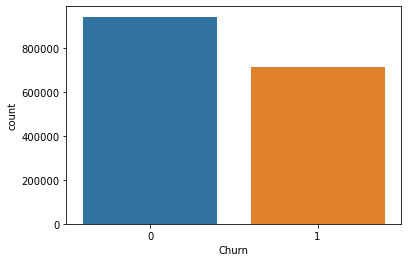

In [48]:
sns.countplot(dfnew.Churn)

In [ ]:
tab = pd.crosstab(index=df['PRODUCT'], columns='proportion')
tab/tab.sum()

In [ ]:
tab = pd.crosstab(index=df['SALES_MODALITY'], columns='proportion')
tab/tab.sum()

In [ ]:
tab = pd.crosstab(index=df['CATEGORY'], columns='proportion')
tab/tab.sum()

In [ ]:
tab = pd.crosstab(index=df['REQUEST_PLACE'], columns='proportion')
tab/tab.sum()

In [ ]:
tab = pd.crosstab(index=df['SEX'], columns='proportion')
tab/tab.sum()

In [ ]:
tab = pd.crosstab(index=df['REGION'], columns='proportion')
tab/tab.sum()

In [ ]:
tab = pd.crosstab(index=df['PROVINCE'], columns='proportion')
tab/tab.sum()

In [ ]:
tab = pd.crosstab(index=df['CITY'], columns='proportion')
tab/tab.sum()

In [ ]:
tab = pd.crosstab(index=df['TYPE_OF_CARD'], columns='proportion')
tab/tab.sum()

In [ ]:
t = df.groupby('SEX')[['Churn']].agg('sum')
t/t.sum()

In [ ]:
t = df.groupby('TYPE_OF_CARD')[['Churn']].agg('sum')
t/t.sum()

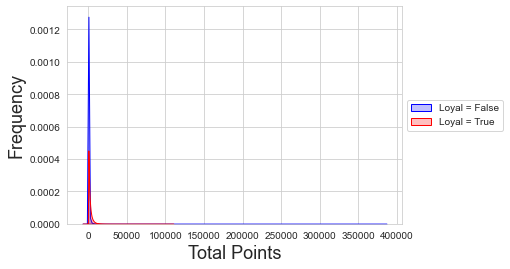

In [49]:
sns.set_style('whitegrid')
g1 = sns.kdeplot(dfnew[dfnew['Churn'] == 1]['TOTAL_POINTS'], shade=True, color="b", label='Loyal = False')
g1 = sns.kdeplot(dfnew[dfnew['Churn'] == 0]['TOTAL_POINTS'], shade=True, color="r", label='Loyal = True')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Total Points', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [51]:
print(dfnew.groupby('Churn')['TOTAL_POINTS'].mean())

Churn
0    2207.061415
1     611.917766
Name: TOTAL_POINTS, dtype: float64
